In [3]:
import pandas as pd
import lightgbm as lgbm
import shap

In [34]:
ols_df = pd.read_csv("PIT_HIC_DOE_CENSUS.csv")

In [35]:
ols_df

,Unnamed: 0,YEAR,AREA,UNDER_18_POVERTY,COC,DOE_HOMELESS_STUDENTS,MEDIAN_HOME_PRICE,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING,MEDIAN_GROSS_RENT,HIC_TOTAL_BEDS,OVERALL_HOMELESS,OVERALL_HOMELESS_UNDER_18
0,0,2013,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1398244.0,GA-500,2549,160800.0,560205.0,106550.0,193304.0,947.0,3284,5536.0,NaN
1,1,2013,"Barrow County, Georgia",19405.0,GA-501,26129,112400.0,8835.0,1587.0,2389.0,877.0,3075,7651.0,NaN
2,2,2013,"Bartow County, Georgia",24450.0,GA-501,26129,131400.0,16341.0,3412.0,4665.0,744.0,3075,7651.0,NaN
3,3,2013,"Bibb County, Georgia",38751.0,GA-501,26129,123000.0,22508.0,4113.0,7846.0,738.0,3075,7651.0,NaN
4,4,2013,"Bulloch County, Georgia",14421.0,GA-501,26129,123400.0,8683.0,872.0,2155.0,730.0,3075,7651.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,315,2022,NaN,NaN,GA-504,490,NaN,NaN,NaN,NaN,NaN,300,549.0,60.0
316,316,2022,NaN,NaN,GA-505,912,NaN,NaN,NaN,NaN,NaN,309,243.0,8.0
317,317,2022,NaN,NaN,GA-506,1975,NaN,NaN,NaN,NaN,NaN,300,380.0,93.0
318,318,2022,NaN,NaN,GA-507,841,NaN,NaN,NaN,NaN,NaN,583,523.0,136.0


In [36]:
ols_df['COC'].value_counts()

GA-501    240
GA-500     10
GA-502     10
GA-503     10
GA-504     10
GA-505     10
GA-506     10
GA-507     10
GA-508     10
Name: COC, dtype: int64

In [38]:
ols_df = ols_df[(ols_df['AREA']=='Barrow County, Georgia') | (ols_df['COC'] != 'GA-501')].reset_index(drop=True)

In [70]:
ols_df['COC'].value_counts()

GA-500    7
GA-501    7
GA-502    7
GA-503    7
GA-504    7
GA-505    7
GA-506    7
GA-507    7
GA-508    7
Name: COC, dtype: int64

In [39]:
ols_df = ols_df.dropna()

In [105]:
target = 'OVERALL_HOMELESS'
features = ['MEDIAN_GROSS_RENT', 
            'YEAR', 
            # 'UNDER_18_POVERTY',
            # 'DOE_HOMELESS_STUDENTS',
       # 'MEDIAN_HOME_PRICE', 
       # 'TOTAL_DISABILITIES', 
       # 'DIF_SELF_CARE',
            'DIF_IND_LIVING', 
       # 'HIC_TOTAL_BEDS',
       # 'OVERALL_HOMELESS_UNDER_18',
       ]

In [106]:
y = ols_df[target] ## Target varaibles
X = ols_df[features]

In [107]:
lgbm_model = lgbm.LGBMRegressor(random_state=42)

In [108]:
lgbm_model.fit(X,  y)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000052 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 3
[LightGBM] [Info] Start training from score 1251.142857
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

LGBMRegressor(random_state=42)

In [109]:
explainer = shap.Explainer(lgbm_model)
shap_values = explainer(X)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


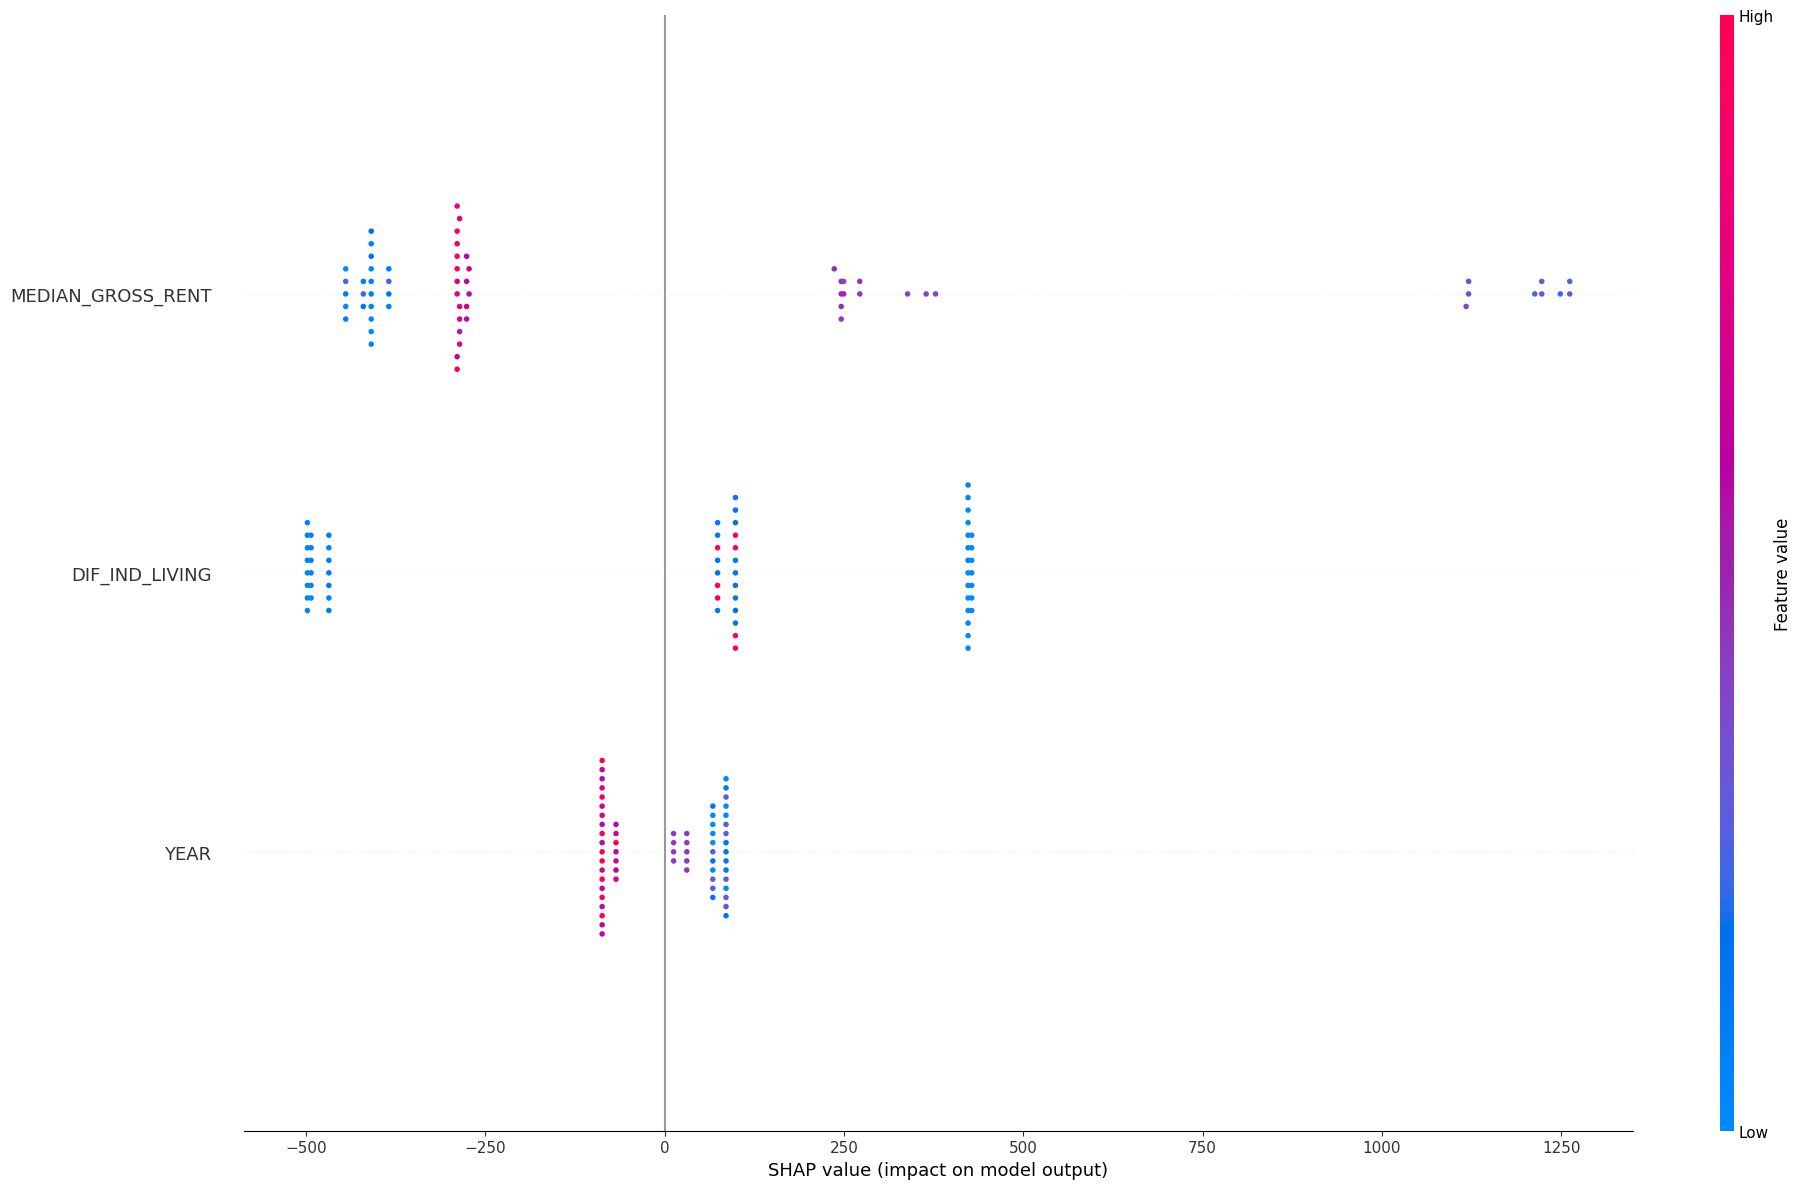

In [110]:
shap.summary_plot(shap_values, X, plot_size=[20,12])

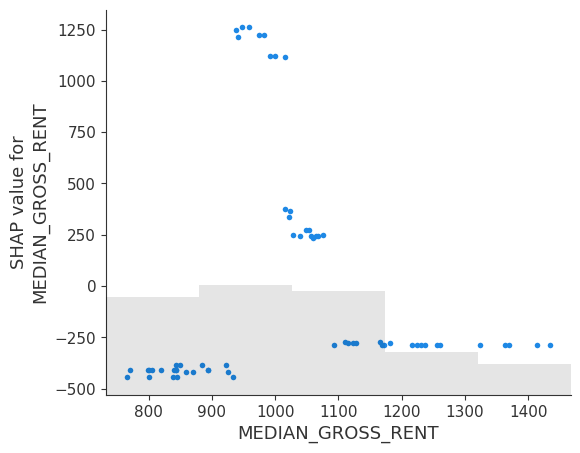

In [111]:
shap.plots.scatter(shap_values[:,"MEDIAN_GROSS_RENT"])

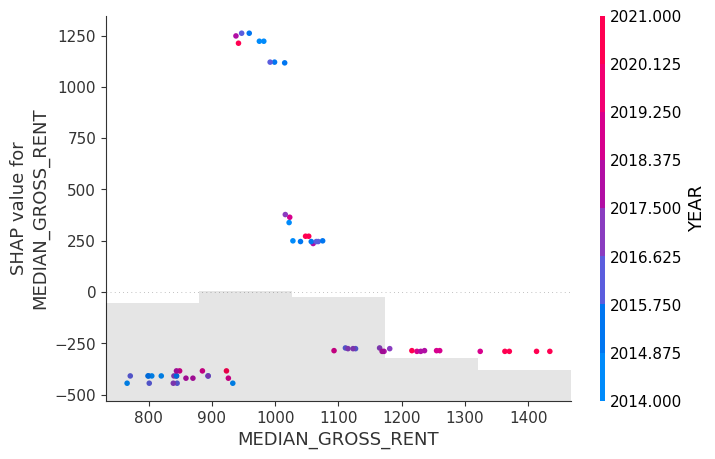

In [112]:
shap.plots.scatter(shap_values[:,"MEDIAN_GROSS_RENT"],  color=shap_values[:,"YEAR"])

In [96]:
shap.plots.scatter(shap_values[:,"MEDIAN_GROSS_RENT"],  color=shap_values[:,"MEDIAN_HOME_PRICE"])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
shap.plots.scatter(shap_values[:,"MEDIAN_GROSS_RENT"],  color=shap_values[:,"YEAR"])

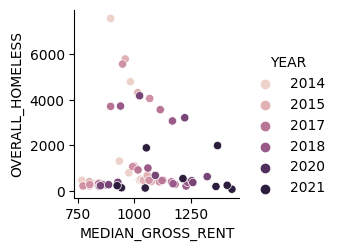

In [134]:

sns.pairplot(ols_df, x_vars = 'MEDIAN_GROSS_RENT', y_vars = 'OVERALL_HOMELESS', hue='YEAR')
plt.show()

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [129]:
target = 'OVERALL_HOMELESS'
# target = 'OVERALL_HOMELESS_UNDER_18'

features = ['MEDIAN_GROSS_RENT', 
            'YEAR', 
            # 'UNDER_18_POVERTY',
            # 'DOE_HOMELESS_STUDENTS',
            #  'MEDIAN_HOME_PRICE', 
           'TOTAL_DISABILITIES', 
             #   'DIF_SELF_CARE', 
            # 'DIF_IND_LIVING', 
       
          #  'HIC_TOTAL_BEDS',
           # 'OVERALL_HOMELESS_UNDER_18',
           ]

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       OVERALL_HOMELESS   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     17.59
Date:                Thu, 24 Aug 2023   Prob (F-statistic):           2.84e-08
Time:                        22:22:55   Log-Likelihood:                -549.55
No. Observations:                  63   AIC:                             1107.
Df Residuals:                      59   BIC:                             1116.
Df Model:                           3                                         
Covariance Type:                  HC3                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.506e+05   2.09e+05      1.197      0.231    -1.6e+05    6.61e+05
MEDIAN_GROSS_RENT     -1.0712      0.772     -1.388      0.165      -2.584       0.442
YEAR                -123.3133    103.965     -1.186      0.236    -327.080      80.454
TOTAL_DISABILITIES     0.0044      0.001      5.425      0.000       0.003       0.006
==============================================================================
Omnibus:                       48.865   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.385
Skew:                           2.461   Prob(JB):                     8.13e-34
Kurtosis:                       8.816   Cond. No.                     2.20e+08
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
[2] The condition number is large, 2.2e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

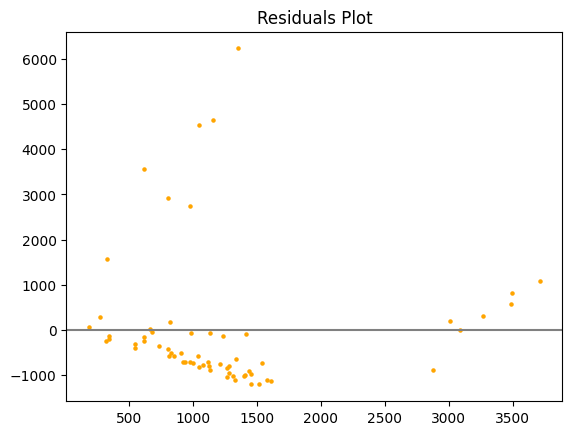

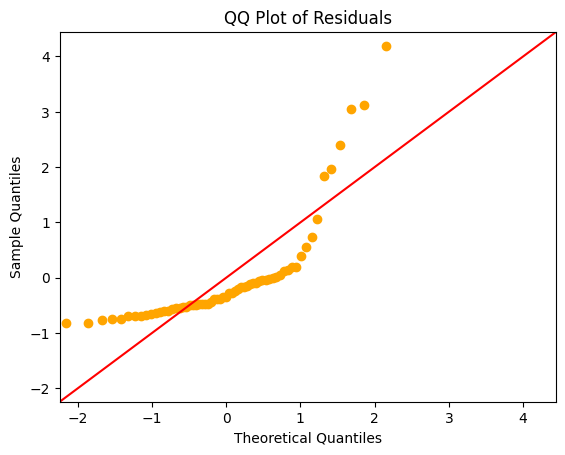

In [130]:
y = ols_df[target] ## Target varaibles
X = ols_df[features]

# adding the constant term
X = add_constant(X, has_constant='add')

# performing the regression
# and fitting the model
ols_model = sm.OLS(y, X).fit(cov_type='HC3')
# printing the summary table

display(ols_model.summary())


    
# View the residual plot of our data
plt.scatter(x = ols_model.fittedvalues, y = ols_model.resid, s = 5, c='orange' ) # s is for size
plt.axhline(y=0, color = 'grey')
plt.title("Residuals Plot")
plt.show()
                                                                
sm.qqplot(ols_model.resid, line = "45", fit = True, markerfacecolor='orange',  markeredgecolor='orange')
plt.title("QQ Plot of Residuals")
plt.show()

In [135]:
ols_df

,Unnamed: 0,YEAR,AREA,UNDER_18_POVERTY,COC,DOE_HOMELESS_STUDENTS,MEDIAN_HOME_PRICE,TOTAL_DISABILITIES,DIF_SELF_CARE,DIF_IND_LIVING,MEDIAN_GROSS_RENT,HIC_TOTAL_BEDS,OVERALL_HOMELESS,OVERALL_HOMELESS_UNDER_18
9,37,2014,"Atlanta-Sandy Springs-Roswell, GA Metro Area",1408062.0,GA-500,2658,170300.0,569751.0,108863.0,206007.0,982.0,3747,4797.0,411.0
10,38,2014,"Barrow County, Georgia",19202.0,GA-501,26548,117300.0,10488.0,1710.0,3190.0,894.0,2756,7577.0,1537.0
11,67,2014,"Fulton County, Georgia",229327.0,GA-502,1619,248800.0,99996.0,20985.0,40153.0,1022.0,365,477.0,136.0
12,68,2014,"Clarke County, Georgia",21040.0,GA-503,494,150000.0,12074.0,2172.0,3551.0,805.0,143,247.0,30.0
13,69,2014,"Richmond County, Georgia",46999.0,GA-504,245,102400.0,31560.0,6855.0,13178.0,766.0,365,472.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,306,2021,"Richmond County, Georgia",46119.0,GA-504,806,132100.0,35863.0,6999.0,12417.0,942.0,182,144.0,20.0
76,307,2021,"Muscogee County, Georgia",50487.0,GA-505,995,170900.0,31396.0,4971.0,11571.0,923.0,254,236.0,24.0
77,308,2021,"Cobb County, Georgia",172631.0,GA-506,1338,342200.0,68250.0,9438.0,27404.0,1413.0,280,252.0,70.0
78,309,2021,"Chatham County, Georgia",60603.0,GA-507,523,236600.0,39307.0,7809.0,12590.0,1216.0,565,548.0,58.0
